# Logistic regression
## 1. Prepare dataset

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

xy = np.loadtxt('diabetes.csv.gz',delimiter=',',dtype=np.float32)
x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]])

## 2. Design model
inherit from nn.Module
we can try different activate function
- ReLU 

In [2]:
class Model(torch.nn.Module):
    def __init__(self):
        # call father class's __init__()
        super(Model,self).__init__()
        # construct an object 'linear'(in_features, out_features, bias=True)
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.activate = torch.nn.Sigmoid()

    def forward(self,x):
        # call callable object 'linear':__call__(self,*args, **kwargs) to forward computational graph
        x = self.activate(self.linear1(x)) # if it's for logistic regression: nn.function.sigmoid(self.linear(x)) 
        x = self.activate(self.linear2(x))
        x = self.activate(self.linear3(x))
        return x
# instance of class LinearModel, call model(x) to compute y hat.
model = Model()

## 3. Construct loss and optimizer
using Pytorch API
try different optimizer in linear regression:
- torch.optim.Adagrad
- Adam
- Adamx
- ASGD
- LBFGS
- RMSprop
- Rprop
- SGD

In [3]:
# create a object(y_hat,y) to compute MSEloss
criterion = torch.nn.BCELoss(reduction='mean')
# use model.parameters() to find all the parameters to be iterated
optimizer = torch.optim.SGD(model.parameters(), lr = 0.003)

## 4.Training cycle
1. forward, 
2. loss, 
3. backward, 
4. update

0 0.6474876999855042
1 0.647481381893158
2 0.6474751234054565
3 0.6474689245223999
4 0.6474626064300537
5 0.6474565267562866
6 0.64745032787323
7 0.6474441289901733
8 0.6474379897117615
9 0.6474319100379944
10 0.6474257707595825
11 0.6474196910858154
12 0.6474136710166931
13 0.6474075317382812
14 0.6474015712738037
15 0.6473955512046814
16 0.6473895311355591
17 0.6473835110664368
18 0.647377610206604
19 0.6473716497421265
20 0.6473657488822937
21 0.6473598480224609
22 0.6473539471626282
23 0.6473480463027954
24 0.6473422646522522
25 0.6473364233970642
26 0.647330641746521
27 0.647324800491333
28 0.6473190188407898
29 0.6473132967948914
30 0.6473075747489929
31 0.6473018527030945
32 0.6472960710525513
33 0.6472904086112976
34 0.6472848057746887
35 0.6472791433334351
36 0.6472734808921814
37 0.6472678184509277
38 0.6472622752189636
39 0.6472566723823547
40 0.6472510695457458
41 0.647245466709137
42 0.6472400426864624
43 0.6472344994544983
44 0.6472289562225342
45 0.6472234725952148
46 0.

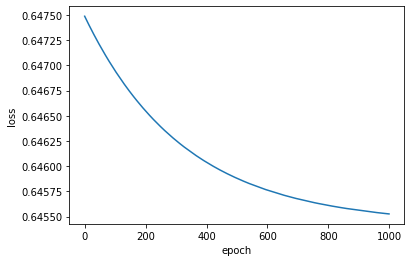

In [4]:
epoch_list = []
loss_list = []
for epoch in range(1000):
    # forward: Predict
    y_pred = model(x_data)  # for now, we use all the data, instead of miniBatch
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())  # loss is an object, it'll call "__str__()"
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    optimizer.zero_grad()   # set to zero
    loss.backward()
    optimizer.step()    # update

plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 5. Learning curve

## 6. Test